In [2]:
pip install pandas scikit-learn matplotlib seaborn streamlit


In [3]:
import pandas as pd

# Expanded dataset
data = {
    'text': [
        "I feel hopeless", "What a beautiful day!", "I am anxious", "Life is pointless",
        "I love myself", "I'm drowning in thoughts", "Happiness is in small things",
        "I can't take it anymore", "Today is a gift", "Everything is overwhelming",
        "Just want to disappear", "I’m calm and peaceful", "I need help", "Feeling blessed"
    ],
    'label': [
        'distressed', 'non-distressed', 'distressed', 'distressed',
        'non-distressed', 'distressed', 'non-distressed',
        'distressed', 'non-distressed', 'distressed',
        'distressed', 'non-distressed', 'distressed', 'non-distressed'
    ]
}

df = pd.DataFrame(data)


Accuracy: 0.3333333333333333

Classification Report:
                 precision    recall  f1-score   support

    distressed       0.50      0.50      0.50         2
non-distressed       0.00      0.00      0.00         1

      accuracy                           0.33         3
     macro avg       0.25      0.25      0.25         3
  weighted avg       0.33      0.33      0.33         3



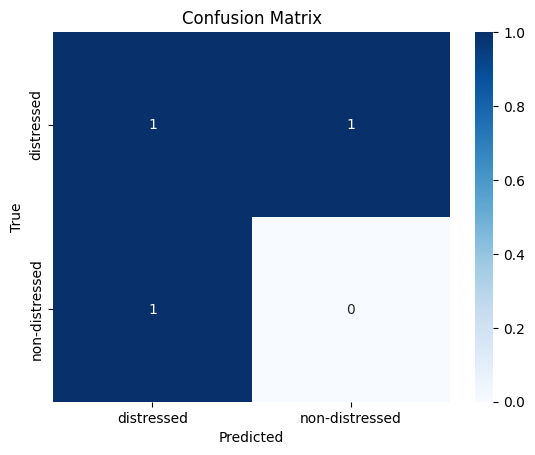

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Data split
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [7]:
test_input = ["I feel broken and empty"]
vec = vectorizer.transform(test_input)
print("Prediction:", model.predict(vec)[0])


Prediction: distressed
